In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import loadtxt
import numpy as np

In [118]:
FILE = "fluidanimate"

In [119]:
files = [f"{FILE}_{i}.data" for i in range(4)]

## Op analysis

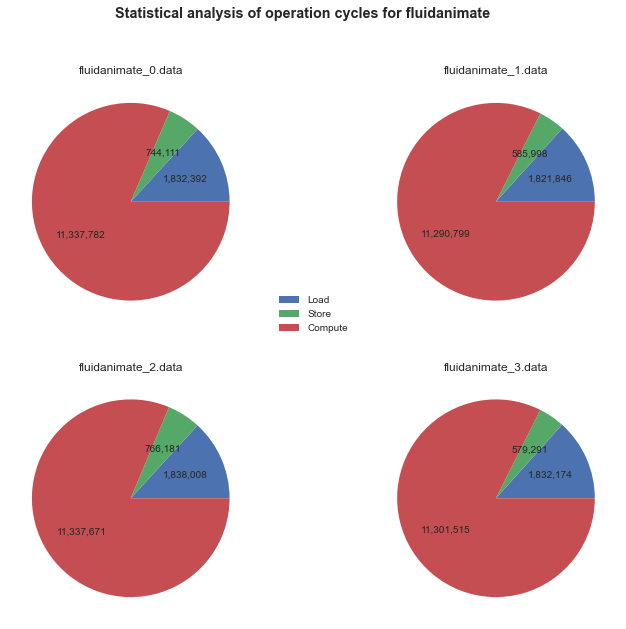

In [121]:
i=1

plt.figure(figsize=(12,10)) 
labels = "Load", "Store", "Compute"
plt.style.use('seaborn')

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:,}'.format(v=val)
    return my_format


plt.suptitle(f"Statistical analysis of operation cycles for {FILE}", fontsize="x-large", fontweight="bold")
for current_file in files:
    my_data = pd.read_csv(current_file, sep=" ", header=None, names=["instr", "arg"], converters={"arg": lambda x: int(x, 16)})
    count = my_data.groupby('instr').count()
    a, b, _ = count["arg"]
    c = my_data.loc[my_data['instr'] == 2, "arg"].sum()
    ax = plt.subplot(2, 2, i)
    ax.set_title(current_file)
    plt.pie([a, b, c], autopct= autopct_format([a, b, c]))
    i+=1
plt.figlegend(loc=10, labels=labels, fontsize='medium')
#plt.savefig(f'{FILE}_op_analysis_2')
plt.show()